In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np

In [3]:
# File to Load
school_data_to_load = "https://raw.githubusercontent.com/bdthai81/pandas-challenge/master/PyCitySchools/Resources/schools_complete.csv"
student_data_to_load = "https://raw.githubusercontent.com/bdthai81/pandas-challenge/master/PyCitySchools/Resources/students_complete.csv"

In [4]:
# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

In [5]:
# Combine the data into a single dataset
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

# df = df.groupby(['id','product'], as_index=False)['quantity'].sum()
# print (df)


In [6]:
df2 = school_data_complete
df1 = df2.groupby('School ID', as_index = False)["math_score", "reading_score", "budget" ].mean()


df3 = df2.groupby(by = ['School ID'], as_index = False)
df3 = df3['math_score'].apply(lambda x: x.mean()/2 )

df3 = df2.groupby(by=['School ID'],as_index=False)[['math_score','reading_score']].apply(lambda x: ((x.mean()/2)))

C:\Users\walki\AppData\Local\Temp\ipykernel_5376\471006917.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df2.groupby('School ID', as_index = False)["math_score", "reading_score", "budget" ].mean()


In [7]:
df5_math_more = round(df2[df2['math_score']>=70].groupby(['School ID'])['math_score'].mean(),0)
df5_reading_more = round(df2[df2['math_score'] >=70].groupby(['School ID'])['math_score'].mean(),0)
df5_math_less =  round(df2[df2['math_score']<=70].groupby(['School ID'])['math_score'].mean(),0)
df5_reading_less = round(df2[df2['math_score']<=70].groupby(['School ID'])['math_score'].mean(),0)
df1.insert(4, "PassingMath",df3['math_score'])
df1.insert(5, "PassingRead",df3['reading_score'])
df1.insert(6, "Math > 70",df5_math_more)
df1.insert(7, "Reading > 70",df5_reading_more)
df1.insert(8, "Math < 70",df5_math_less)
df1.insert(9, "Reading < 70",df5_reading_less)

df1

,School ID,math_score,reading_score,budget,PassingMath,PassingRead,Math > 70,Reading > 70,Math < 70,Reading < 70
0,0,76.629414,81.182722,1910635.0,38.314707,40.591361,84.0,84.0,63.0,63.0
1,1,76.711767,81.158020,1884411.0,38.355883,40.579010,84.0,84.0,62.0,62.0
2,2,83.359455,83.725724,1056600.0,41.679727,41.862862,84.0,84.0,69.0,69.0
3,3,77.289752,80.934412,3022020.0,38.644876,40.467206,85.0,85.0,62.0,62.0
4,4,83.351499,83.816757,917500.0,41.675749,41.908379,84.0,84.0,69.0,69.0
5,5,83.274201,83.989488,1319574.0,41.637100,41.994744,84.0,84.0,69.0,69.0
6,6,83.061895,83.975780,1081356.0,41.530947,41.987890,84.0,84.0,69.0,69.0
7,7,77.048432,81.033963,3124928.0,38.524216,40.516982,85.0,85.0,63.0,63.0
8,8,83.803279,83.814988,248087.0,41.901639,41.907494,85.0,85.0,69.0,69.0
9,9,83.839917,84.044699,585858.0,41.919958,42.022349,85.0,85.0,69.0,69.0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

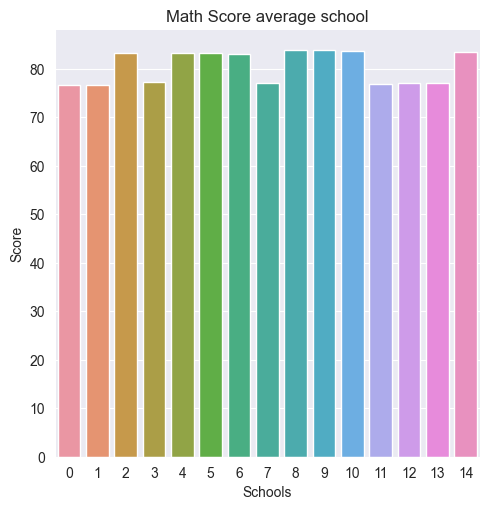

In [9]:
# Creating your first bar chart in Seaborn
sns.set_style('darkgrid')
sns.catplot(
    data=df1,
    x='School ID',
    y='math_score',
    kind='bar'
)
plt.title('Math Score average school')
plt.xlabel('Schools')
plt.ylabel('Score')
plt.show()